Using a set of independent variables, a logistic regression predicts the likelihood of the dependent variable occuring. It's good for classification problems, such as seeing if certain factors can predict certain outcomes will be the case for children. We often use a logistic regression to generate odds ratios, which can give us an idea if an outcome will or won't happen in a given case. Above 1 is more likely, below one is less likely.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv')
# Really this data needs some cleaning done to it as htere's some zero values where there shouldn't be. Removing
# them makes our data set smaller, but improves data quality. Another option could be filling them with new values, for
# instance ones that fit to a normal distribution.

# These are the things we think might be related to diabetes outcomes we want to test
features = ['Pregnancies',
            'Glucose', 
            'BloodPressure',
            'SkinThickness',
            'Insulin',	
            'BMI',
            'DiabetesPedigreeFunction',
            'Age']

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
X = df[features]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

lr = LogisticRegression(random_state=1, max_iter=500)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [9]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,  10],
       [ 35,  31]])

Text(0.5, 427.9555555555555, 'Predicted label')

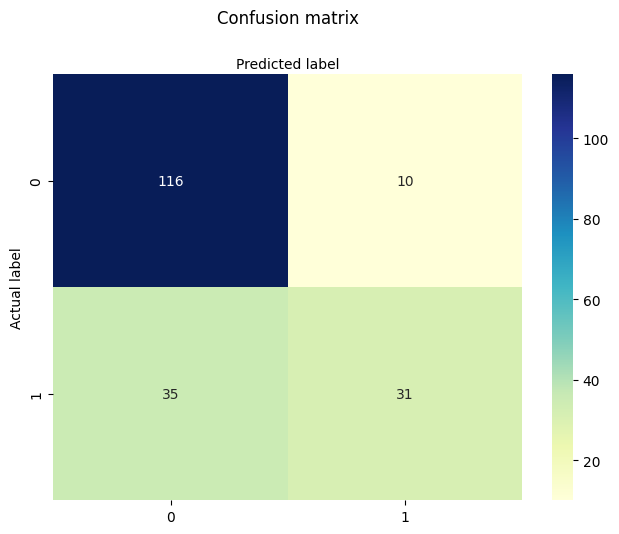

In [10]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
Using these three metrics, we can understand how well a given classification model is able to predict the outcomes for some response variable.

Fortunately, when fitting a classification model in Python we can use the classification_report() function from the sklearn library to generate all three of these metrics.

The following example shows how to use this function in practice.

(from: https://www.statology.org/sklearn-classification-report/)

In [11]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print(output_report)
print(output_report['accuracy'])

# We can see from this report that the model is pretty good at predicting that people do not have diabetes,
# but pretty poor at determining if people do have diabetes

{'without diabetes': {'precision': 0.7682119205298014, 'recall': 0.9206349206349206, 'f1-score': 0.8375451263537906, 'support': 126.0}, 'with diabetes': {'precision': 0.7560975609756098, 'recall': 0.4696969696969697, 'f1-score': 0.5794392523364486, 'support': 66.0}, 'accuracy': 0.765625, 'macro avg': {'precision': 0.7621547407527056, 'recall': 0.6951659451659451, 'f1-score': 0.7084921893451196, 'support': 192.0}, 'weighted avg': {'precision': 0.7640476094330481, 'recall': 0.765625, 'f1-score': 0.7488212321603293, 'support': 192.0}}
0.765625


More info on the ROC curve here: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=The%20area%20under%20the%20ROC,curve%20(AUC)%20of%201.0.

It's a demonstration of the probability, if given a positive and negative outcome, that it will rank the positive outcome over the negative one. If given the data for a positive and negative diabetes outcome, how likely is it that it will predict the positive is positve and the negative is negative.

A perfect model would have a straight line at 1 going all the way across. A model that's no better than a coin flip would be a 45 degree line.

Our model is better than flipping a coin.

The points closest to 0,1 represent the range of the best preforming thresholds for the model. We need to choose a threshold that suits out case. As false negatives for diabetes are costly, we want a threshold that doesn't risk that, even if it's worse for our true positive rate.

We can alter our threshold (standard is 0.5) by altering the line: y_pred_proba = lr.predict_proba(X_test)[::,1] to y_pred_proba = (lr.predict_proba(X_test)[::,1] >= new_threshold).astype(int) 

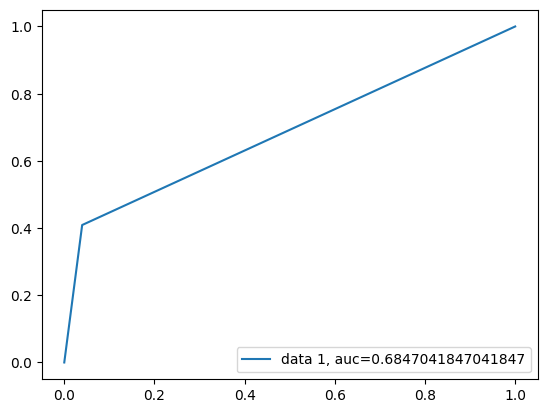

In [13]:
y_pred_proba = (lr.predict_proba(X_test)[::,1] >= 0.6).astype(int)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Here we are going to rebuild the model over and over using every possible combination of features to find the one that builds the best model, we'll then print that and use it going forward.

We could then go on and re do what we've done earlier with that new feature set.

In [14]:
import itertools

combinations = []

for i in range(1, 9):
    combs_at_i = list(itertools.combinations(features, i))
    combinations.extend(combs_at_i)

print(combinations)

accuracy = 0
best_X = 0

for feature_set in combinations:
    X = df[list(feature_set)]
    y = df.Outcome
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

    lr_iterated = LogisticRegression(random_state=1, max_iter=400)

    lr_iterated.fit(X_train, y_train)
    y_pred = lr_iterated.predict(X_test)

    output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

    acc = output_report['accuracy']
    if acc > accuracy:
        accuracy = acc
        best_X = list(feature_set)

print(best_X)

[('Pregnancies',), ('Glucose',), ('BloodPressure',), ('SkinThickness',), ('Insulin',), ('BMI',), ('DiabetesPedigreeFunction',), ('Age',), ('Pregnancies', 'Glucose'), ('Pregnancies', 'BloodPressure'), ('Pregnancies', 'SkinThickness'), ('Pregnancies', 'Insulin'), ('Pregnancies', 'BMI'), ('Pregnancies', 'DiabetesPedigreeFunction'), ('Pregnancies', 'Age'), ('Glucose', 'BloodPressure'), ('Glucose', 'SkinThickness'), ('Glucose', 'Insulin'), ('Glucose', 'BMI'), ('Glucose', 'DiabetesPedigreeFunction'), ('Glucose', 'Age'), ('BloodPressure', 'SkinThickness'), ('BloodPressure', 'Insulin'), ('BloodPressure', 'BMI'), ('BloodPressure', 'DiabetesPedigreeFunction'), ('BloodPressure', 'Age'), ('SkinThickness', 'Insulin'), ('SkinThickness', 'BMI'), ('SkinThickness', 'DiabetesPedigreeFunction'), ('SkinThickness', 'Age'), ('Insulin', 'BMI'), ('Insulin', 'DiabetesPedigreeFunction'), ('Insulin', 'Age'), ('BMI', 'DiabetesPedigreeFunction'), ('BMI', 'Age'), ('DiabetesPedigreeFunction', 'Age'), ('Pregnancies',

/usr/local/python/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr

['Pregnancies', 'Glucose', 'BMI']
